In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, StrMethodFormatter
plt.style.use('ggplot')
font = {'weight': 'bold'
       ,'size': 16}
plt.rc('font', **font)

In [3]:
'''
If you've already cleaned the data, just read in the pickle file and comment out the csv.
Then scroll down to the visualizations
'''

# tot = pd.read_pickle('../data/tot_eda.pkl')

tot_samp = pd.read_pickle('../data/tot_samp_eda.pkl')

# tot = pd.read_csv('../data/ga_archive/tbl_prod_GABU202012_all.csv', sep = '|')

In [3]:
def clean_data_for_eda(df):
    vmask = df['date_last_voted'] >= '2020-11-03'
    df['voted'] = vmask.map({True: int(1), False: int(0)})
    
    df = df.drop(['land_district','land_lot','status_reason','city_precinct_id','county_districta_name',
                'county_districta_value','county_districtb_name','county_districtb_value','city_dista_name',
                'city_dista_value','city_distb_name','city_distb_value','city_distc_name','city_distc_value',
                'city_distd_name','city_distd_value','party_last_voted','city_school_district_name','municipal_name',
                'municipal_code','ward_city_council_code','race_desc','residence_city','residence_zipcode',
                'county_precinct_id','city_school_district_value','senate_district','house_district',
                'judicial_district','commission_district','school_district','date_added','date_changed',
                'district_combo','last_contact_date','ward_city_council_name','date_last_voted','registration_date',
                'registration_number','voter_status'], axis=1)
    
    counties = ['Appling','Atkinson','Bacon','Baker','Baldwin','Banks','Barrow','Bartow','Ben_Hill','Berrien','Bibb',
            'Bleckley','Brantley','Brooks','Bryan','Bulloch','Burke','Butts','Calhoun','Camden','Candler','Carroll',
            'Catoosa','Charlton','Chatham','Chattahoochee','Chattooga','Cherokee','Clarke','Clay','Clayton','Clinch',
            'Cobb','Coffee','Colquitt','Columbia','Cook','Coweta','Crawford','Crisp','Dade','Dawson','De_Kalb',
            'Decatur','Dodge','Dooly','Dougherty','Douglas','Early','Echols','Effingham','Elbert','Emanuel','Evans',
            'Fannin','Fayette','Floyd','Forsyth','Franklin','Fulton','Gilmer','Glascock','Glynn','Gordon','Grady',
            'Greene','Gwinnett','Habersham','Hall','Hancock','Haralson','Harris','Hart','Heard','Henry','Houston',
            'Irwin','Jackson','Jasper','Jeff_Davis','Jefferson','Jenkins','Johnson','Jones','Lamar','Lanier',
            'Laurens','Lee','Liberty','Lincoln','Long','Lowndes','Lumpkin','Macon','Madison','Marion','McDuffie',
            'McIntosh','Meriwether','Miller','Mitchell','Monroe','Montgomery','Morgan','Murray','Muscogee','Newton',
            'Oconee','Oglethorpe','Paulding','Peach','Pickens','Pierce','Pike','Polk','Pulaski','Putnam','Quitman',
            'Rabun','Randolph','Richmond','Rockdale','Schley','Screven','Seminole','Spalding','Stephens','Stewart',
            'Sumter','Talbot','Taliaferro','Tattnall','Taylor','Telfair','Terrell','Thomas','Tift','Toombs','Towns',
            'Treutlen','Troup','Turner','Twiggs','Union','Upson','Walker','Walton','Ware','Warren','Washington',
            'Wayne','Webster','Wheeler','White','Whitfield','Wilcox','Wilkes','Wilkinson','Worth']
    
    keys = range(1,161)
    county_dict = {}
    for key in keys:
        for county in counties:
            county_dict[key] = county
            counties.remove(county)
            break
            
    df['county_code'] = df['county_code'].replace(county_dict)
    df = df.rename(columns={'county_code': 'county'})
    
    rural = ['Appling', 'Atkinson','Bacon','Baker','Baldwin','Banks','Ben_Hill','Berrien','Bleckley','Brantley','Brooks',
         'Bryan','Burke','Butts','Calhoun','Candler','Charlton','Chattahoochee','Chattooga','Clay','Clinch','Coffee',
         'Colquitt','Cook','Crawford','Crisp','Dade','Dawson','Decatur','Dodge','Dooly','Early','Echols','Elbert',
         'Emanuel','Evans','Fannin','Franklin','Gilmer','Glascock','Grady','Greene','Habersham','Hancock','Haralson',
         'Harris','Hart','Heard','Irwin','Jasper','Jeff_Davis','Jefferson','Jenkins','Johnson','Jones','Lamar',
         'Lanier', 'Laurens','Lee','Lincoln','Long','Lumpkin','Macon','Madison','Marion','McDuffie','McIntosh',
         'Meriwether','Miller','Mitchell','Monroe','Montgomery','Morgan','Murray','Oconee','Oglethorpe','Peach',
         'Pickens','Pierce','Pike','Polk','Pulaski','Putnam','Quitman','Rabun','Randolph','Schley','Screven',
         'Seminole','Stephens','Stewart','Sumter','Talbot','Taliaferro','Tattnall','Taylor','Telfair','Terrell',
         'Thomas','Tift','Toombs','Towns','Treutlen','Turner','Twiggs','Union','Upson','Ware','Warren','Washington',
         'Wayne','Webster','Wheeler','White','Wilcox','Wilkes','Wilkinson','Worth']
    
    urban = ['Barrow','Bartow','Bibb','Bulloch','Carroll','Catoosa','Chatham','Cherokee','Clarke','Clayton','Cobb',
         'Columbia','Coweta','De_Kalb','Dougherty','Douglas','Effingham','Fayette','Floyd','Forsyth','Fulton','Glynn',
         'Gordon','Gwinnett','Hall','Henry','Houston','Jackson','Lowndes','Muscogee','Newton','Paulding','Richmond',
         'Rockdale','Spalding','Troup','Walker','Walton','Whitfield']
    
    military = ['Camden','Liberty']
    
    df = df.replace(rural, 'Rural')
    df = df.replace(urban, 'Urban')
    df = df.replace(military, 'Military')
    
    df['age'] = 2020 - df['birthyear']
    df['age'] = df['age'].astype('int64')
    df = df.drop(['birthyear'], axis=1)
    
    df.congressional_district = df.congressional_district.astype('str')
    
    return df

In [4]:
def plot_kde(df):

    fig, ax = plt.subplots(figsize = (12,8))

    sns.kdeplot(df.loc[(df['voted']==1), 'age'], color =  '#F8766D', shade = True, label= 'Voted')
    sns.kdeplot(df.loc[(df['voted']==0), 'age'], color =  '#619CFF', shade = True, label= 'Did Not Vote')

    plt.xlabel('Voter Age')
    plt.ylabel('Probability Density')

    ax.set(xlim=(8, 130))
    ax.legend(loc='upper right')
    ax.set_title("Turnout by Age", y=0.99, fontsize=24)

    plt.tight_layout(rect=(0,0,1,0.98))
    plt.savefig("../images/original_kde_plots.png", transparent=True, dpi=200)

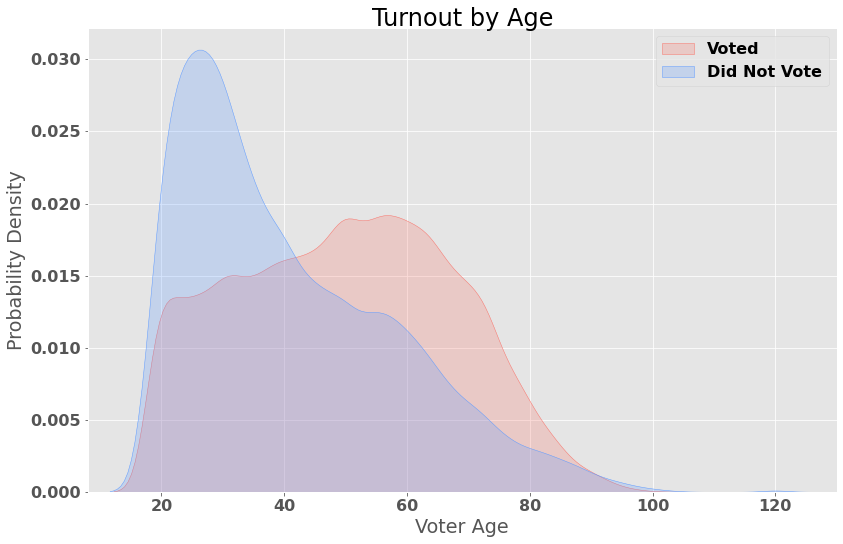

In [5]:
plot_kde(tot_samp)

In [6]:
def bar_categorical_plot(cat_df, cat_col, ax):
        """ Plots a 100% Fill Stacked Barchart of Churned vs Active users using the values passed.
            Args:
                cat_df (Pandas Dataframe): The predictors and target that you want to use for the 
                                        X axis on the barchart
                cat_col (str): The column name of the categorical data to plot
                ax (matplotlib axis): An axis to plot the barchat
            Returns:
                None
                Modifies ax (matplotlib axis): An axis with the barchart plot
        """
        group_data = cat_df.groupby([cat_col, 'voted']).size().unstack()
        group_data.columns = ['Non Voter', 'Voter']
        group_data = group_data.fillna(value=0)
        group_data['Eligible Voters'] = group_data['Non Voter'] + group_data['Voter']
        group_data['Did Not Vote'] = group_data['Non Voter'] / group_data['Eligible Voters']
        group_data['Voted'] = group_data['Voter'] / group_data['Eligible Voters']
        total_users = group_data.sort_values('Did Not Vote', ascending=False)['Eligible Voters']
        turnout = group_data[['Did Not Vote', 'Voted']].sort_values('Did Not Vote', ascending=False)
        turnout.plot.bar(stacked=True, ax=ax, color=['#619CFF', '#F8766D'], alpha = 0.5)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode="anchor")
        ax.set_xlabel('')
        ax.set_title(cat_col.replace('_', ' ').title())
        ax.set_ylabel('% of Eligible Voters')
        ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
        ax.legend(loc='upper right')

In [9]:
def plot_categorical_features(df):
        """ Visualize categorical predictors using stacked 100% fill barcharts
            Args: 
                None 
            
            Returns:
                None:
                Saves the barchart plots from the categorical features into a .png file for viewing
        """
        categorical_data = df
        categorical_columns = ['race', 'gender', 'congressional_district', 'county']
        
        fig, axs = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(20,35))

        for col, ax in zip(categorical_columns, axs.flatten()):
            bar_categorical_plot(categorical_data, col, ax)

        plt.tight_layout(rect=(0,0,1,0.98))
        plt.suptitle(f"100% Fill Barchart for Categorical Predictors", y=0.99, fontsize=35)
        plt.savefig("../images/original_barchart_plots.png", transparent=True, dpi=200)

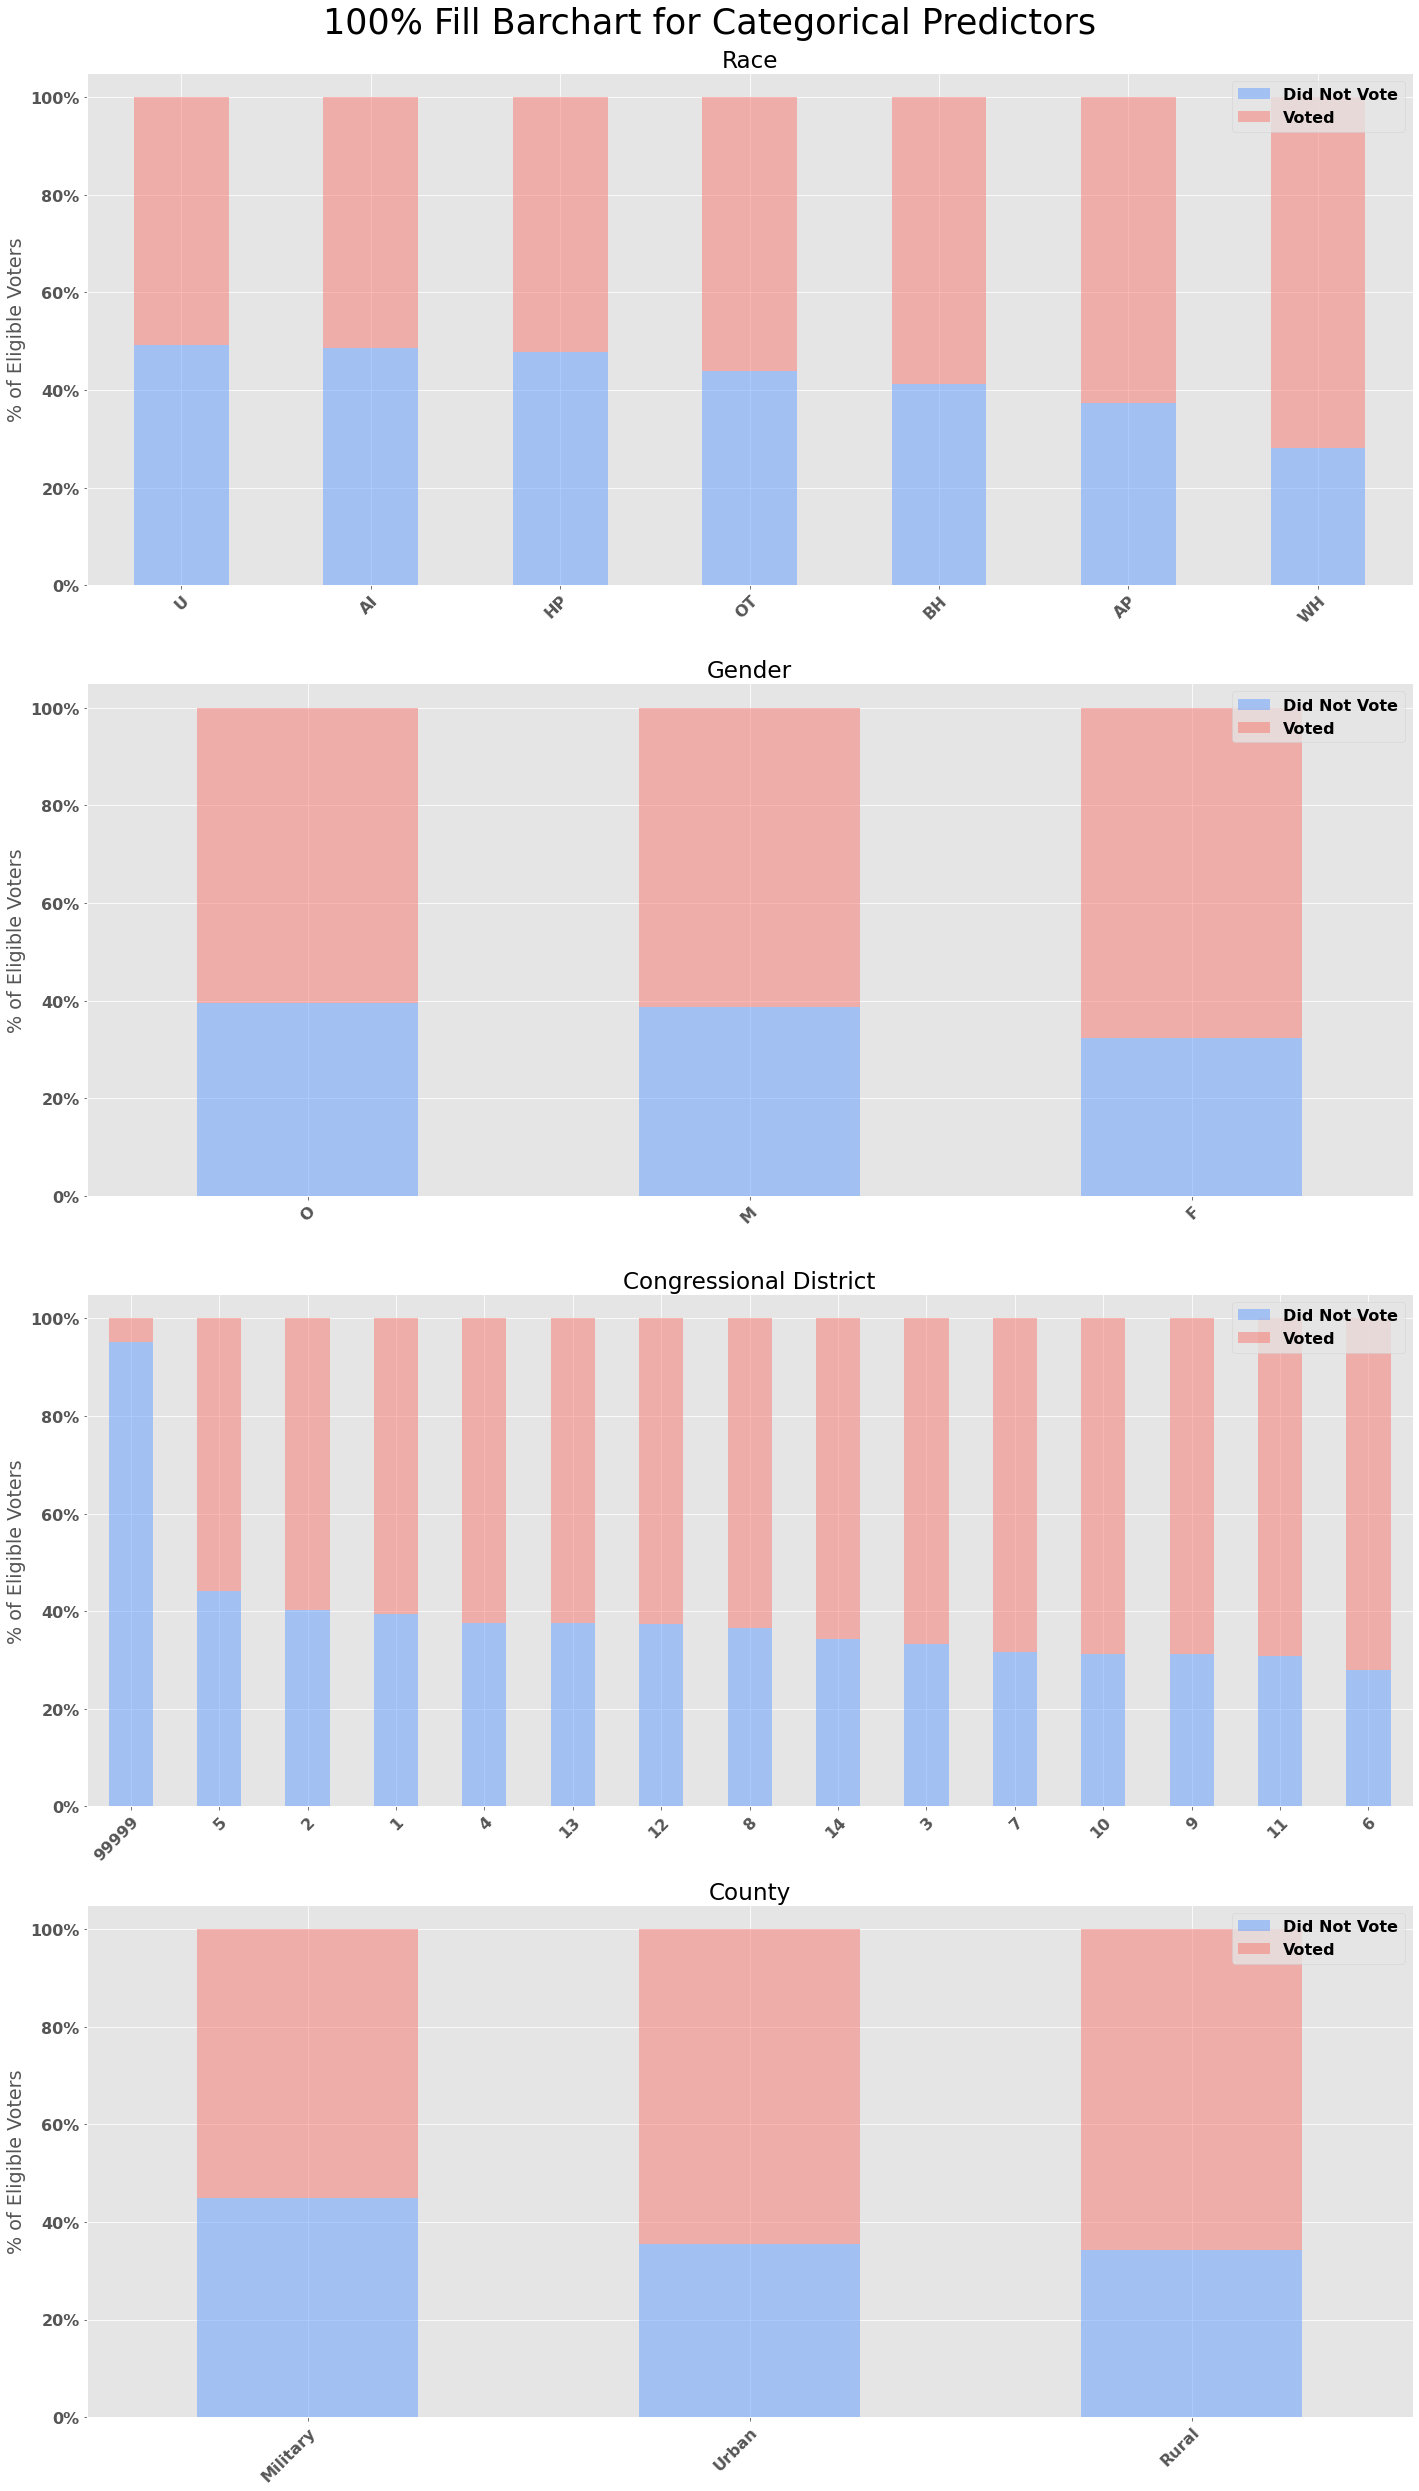

In [10]:
plot_categorical_features(tot_samp)

In [13]:
def plot_one_categorical_feature(df, col):
        """ Visualize categorical predictors using stacked 100% fill barcharts
            Args: 
                None 
            
            Returns:
                None:
                Saves the barchart plots from the categorical features into a .png file for viewing
        """
        categorical_data = df
        cols = ['race', 'gender', 'congressional_district', 'county']
        
        fig, ax = plt.subplots(figsize = (12,6))
        
        bar_categorical_plot(categorical_data, cols[col], ax)

        plt.tight_layout(rect=(0,0,1,0.98))
        plt.savefig(f"../images/{cols[col]}_bar.png", transparent=True, dpi=200)

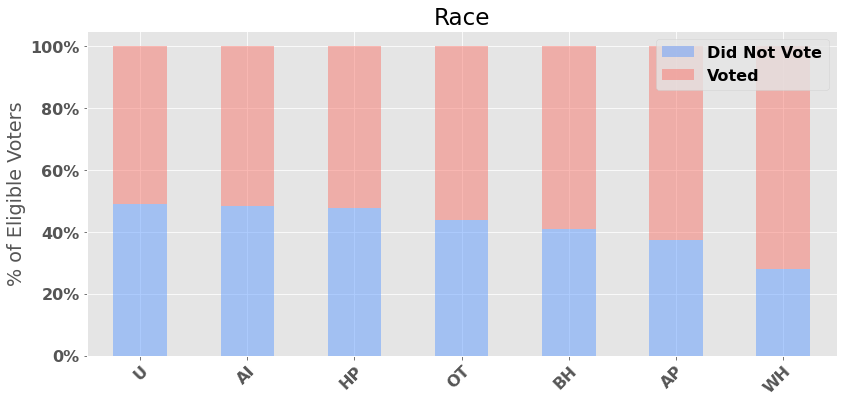

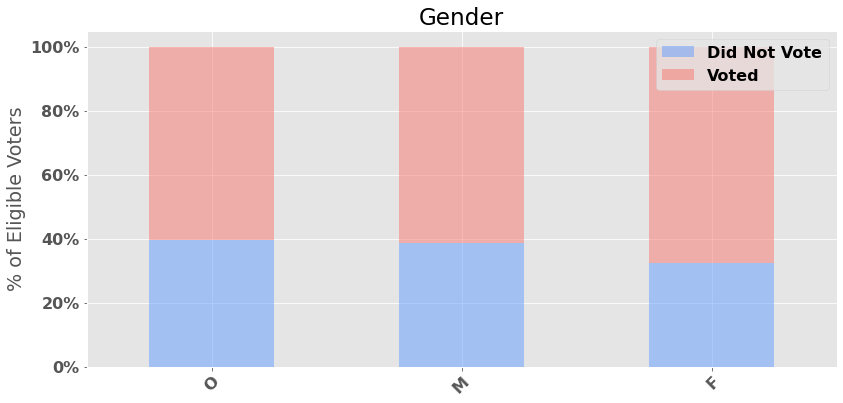

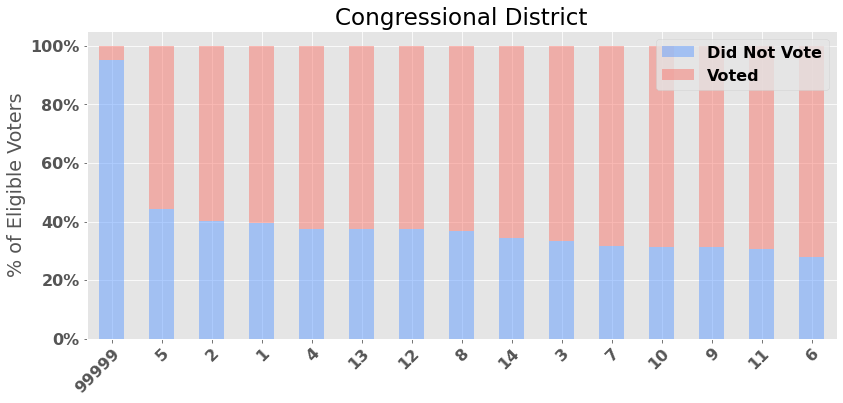

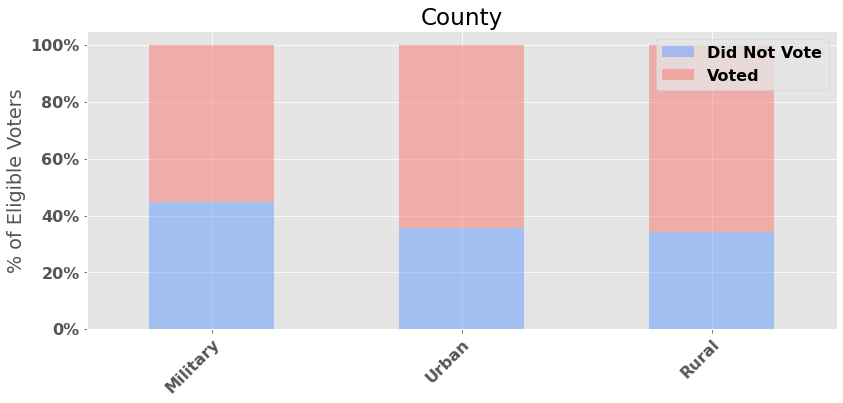

In [14]:
cols = ['race', 'gender', 'congressional_district', 'county']
for num in range(len(cols)):
    plot_one_categorical_feature(tot_samp, num)